# Customer Churn Prediction

## Data Source
The dataset used for this analysis can be found on Kaggle: [Customer Churn Prediction](https://www.kaggle.com/code/bhartiprasad17/customer-churn-prediction).

## Problem Statement
Customer churn refers to the phenomenon where customers stop doing business with a company. Predicting churn can help businesses proactively address customer concerns and retain clients, which is more cost-effective than acquiring new ones.

### Objective
The goal is to predict whether a customer will churn based on their demographics and usage patterns using machine learning techniques. Additionally, we'll identify key factors that influence churn.


## Steps and Methodology
1. **Data Understanding and Cleaning**:
   - Load and explore the dataset.
   - Handle missing values and outliers.

2. **Exploratory Data Analysis (EDA)**:
   - Identify correlations and patterns in the data.
   - Visualize the distribution of features.

3. **Feature Engineering**:
   - Encode categorical variables.
   - Scale numerical variables if required.

4. **Model Building**:
   - Split the data into training and testing sets.
   - Train machine learning models to predict churn.
   - Evaluate model performance.

5. **Insights and Recommendations**:
   - Interpret the results and provide actionable insights.

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [3]:
### Data Loading and Exploration

# Load the dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check for missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Basic dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Summary statistics of numerical features
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


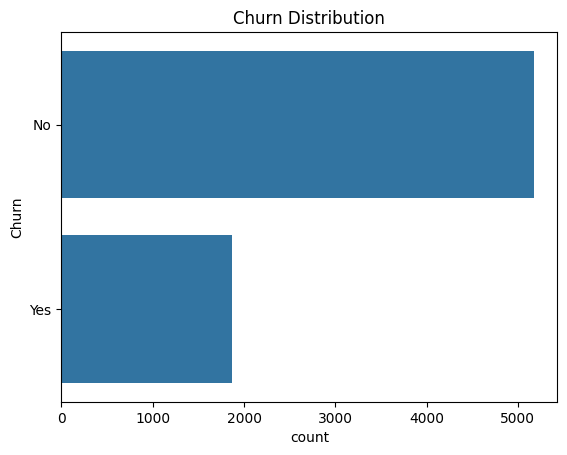

In [7]:
# Visualize the distribution of the target variable
sns.countplot(data['Churn'])
plt.title('Churn Distribution')
plt.show()

In [8]:
data.drop(columns=data.columns[0], axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Handle categorical variables
categorical_features = data.select_dtypes(include=['object']).columns

# Label Encoding for binary categorical columns
label_encoder = LabelEncoder()
for col in categorical_features:
    if data[col].nunique() == 2:
        data[col] = label_encoder.fit_transform(data[col])

# One-Hot Encoding for other categorical variables
data = pd.get_dummies(data, columns=[col for col in categorical_features if data[col].nunique() > 2], drop_first=True)

In [10]:
# Handle missing values
data.fillna(data.median(), inplace=True)

In [ ]:
# # Check correlations between numerical features
# correlation_matrix = data.corr()
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
# plt.title('Feature Correlation Heatmap')
# plt.show()

In [11]:
# Split data into features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Initialize classifiers
classifiers = {
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(probability=True),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Classifier: {name}")
    print(classification_report(y_test, y_pred))
    results[name] = acc

# Voting Classifier (Combining all models except CatBoost due to compatibility issues)
voting_clf = VotingClassifier(estimators=[
    ('knn', classifiers["KNN"]),
    ('svc', classifiers["SVC"]),
    ('rf', classifiers["Random Forest"]),
    ('logreg', classifiers["Logistic Regression"]),
    ('dt', classifiers["Decision Tree"]),
    ('adb', classifiers["AdaBoost"]),
    ('gbc', classifiers["Gradient Boosting"]),
    ('xgb', classifiers["XGBoost"]),
], voting='soft')

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
voting_acc = accuracy_score(y_test, y_pred_voting)
print("Classifier: Voting Classifier")
print(classification_report(y_test, y_pred_voting))

# Add voting accuracy to results
results["Voting Classifier"] = voting_acc

# Compare all models
print("\nModel Comparison:")
for model, acc in results.items():
    print(f"{model}: Accuracy = {acc:.2f}")


Classifier: KNN
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.33      0.01      0.01       373

    accuracy                           0.73      1409
   macro avg       0.53      0.50      0.43      1409
weighted avg       0.63      0.73      0.63      1409

Classifier: SVC
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1036
           1       0.50      0.76      0.60       373

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.79      0.74      0.75      1409

Classifier: Random Forest
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.68      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg    

c:\users\amfua\documents\python_projects\project_1\project_env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classifier: AdaBoost
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.66      0.57      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Classifier: Gradient Boosting
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.71      0.53      0.60       373

    accuracy                           0.82      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.81      0.82      0.81      1409

Classifier: CatBoost
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.70      0.52      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
we

c:\users\amfua\documents\python_projects\project_1\project_env\lib\site-packages\xgboost\core.py:158: UserWarning: [00:02:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classifier: XGBoost
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.62      0.52      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



c:\users\amfua\documents\python_projects\project_1\project_env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\users\amfua\documents\python_projects\project_1\project_env\lib\site-packages\xgboost\core.py:158: UserWarning: [00:19:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classifier: Voting Classifier
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.66      0.45      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409


Model Comparison:
KNN: Accuracy = 0.73
SVC: Accuracy = 0.74
Random Forest: Accuracy = 0.80
Logistic Regression: Accuracy = 0.78
Decision Tree: Accuracy = 0.77
AdaBoost: Accuracy = 0.81
Gradient Boosting: Accuracy = 0.82
CatBoost: Accuracy = 0.81
XGBoost: Accuracy = 0.79
Voting Classifier: Accuracy = 0.79


In [1]:
# Train a Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))




NameError: name 'GradientBoostingClassifier' is not defined

In [ ]:
# Feature Importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(feature_importances.head(10))